
# Analisis Sentimen SHOWROOM dari Google Play Store
---
SHOWROOM adalah sebuah aplikasi streaming langsung yang berasal dari Jepang dan cukup sering digunakan di Indonesia. Aplikasi ini memungkinkan pengguna untuk melakukan streaming langsung dari penampilan mereka dan menonton pertunjukan langsung yang dilakukan oleh idola, pengisi suara, dan karakter anime. Tidak hanya idola Jepang terkenal yang dapat ditemui di TV atau media sosial, tetapi juga orang biasa dan artis yang tengah populer di berbagai negara.

Dalam melakukan penilaian terhadap aplikasi SHOWROOM, para pengguna biasanya menuliskan review melalui Google Play Store. Namun review pada aplikasi tersebut hanya berupa teks tanpa arti tertentu dan terdapat beberapa pengguna yang memberikan rating yang tidak sesuai dengan bintang yang diberikan. Oleh karena itu dilakukan analisis yang dapat mengklasifikasikan review sebagai sentimen pengguna.

Referensi:
1. [Analisis Sentimen Ulasan MyXL dengan SVM](https://www.kaggle.com/code/dimasdiandraa/analisis-sentimen-ulasan-myxl-dengan-svm/notebook#Hasil-Klasifikasi)
2. Hands On Text Classification


## Scraping Data



Scraping data dilakukan dengan mengumpukan data ulasan pengguna SHOWROOM dari Google Play Store menggunakan bantuan dari library google-play-scraper dan IDE Google Collab. Data yang diambil berupa nama pemberi ulasan, nilai bintang yang diberikan, waktu ulasan dikirim dan isi review ulasan.

In [ ]:
!pip install google-play-scraper

In [ ]:
from google_play_scraper import app
from google_play_scraper import Sort, reviews

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data_review, continuation_token = reviews(
    'jp.dena.showroom',
    lang = 'id', # Mengatur bahasa ulasan yang ingin diambil, dalam hal ini bahasa Indonesia
    country = 'id', # Mengatur negara pengirim ulasan, dalam hal ini negara Indonesia
    sort = Sort.MOST_RELEVANT, # Diurut berdasarkan ulasan yang paling relevan
    count = 300, # Banyaknya ulasan yang ingin diambil, dalam hal ini sebanyak 300
    filter_score_with=None
)

df = pd.DataFrame(np.array(data_review), columns = ['ulasan'])
df = df.join(pd.DataFrame(df.pop('ulasan').tolist()))

In [ ]:
# Memasukkan data hasil scraping ke dalam file csv
df = df[['userName', 'score', 'at', 'content']]
df = df.sort_values(by = 'at', ascending = False)
df.to_csv("Ulasan Showroom Data.csv", index = False)

# Pelabelan Dataset

Pelabelan dataset dilakukan secara manual dengan membagi label menjadi tiga kategori yaitu positif (1), netral (0), atau negatif(-1).

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_review = pd.read_csv('/content/drive/MyDrive/Data/Ulasan Showroom Data Labelled.csv')

In [ ]:
df_review

,userName,score,at,Ulasan,Sentimen
0,Rolandes Tri Putra Simanjuntak,5,2023-09-25 10:58:54,Bagus bisa liat oshi,1
1,Nafisah Nuraini,2,2023-09-25 10:22:24,Kenapa gk bisa login padahal udh sesuai petunj...,-1
2,Zinedine,1,2023-09-25 7:16:03,"Jaringan lancar bisa buat streaming YT, eh mas...",-1
3,Jason Frans,5,2023-09-24 14:38:57,"Apknya bagus,bisa liat cwe"" cantik",1
4,kaisar romawi tenggara,5,2023-09-23 13:37:55,saya suka sr apalagi michie nya pas lagi sr,1
...,...,...,...,...,...
295,SOFFA AL MARWAH,5,2020-10-04 6:46:05,perasaan dulu gw udh pernah kasih rating geh t...,1
296,Archo,5,2020-09-24 3:23:58,Mantap.. Tapi gimana cara beli gift nya.. Ga n...,1
297,TERBALIK DUNIA,5,2020-09-21 7:40:24,"Intinya bagus fiturnya juga mantap , dan yqng ...",1
298,Mahdi Hanif,5,2020-09-18 13:17:39,"Bang, fitur translate ditambahin bang, masih a...",1


In [ ]:
import matplotlib.pyplot as plt

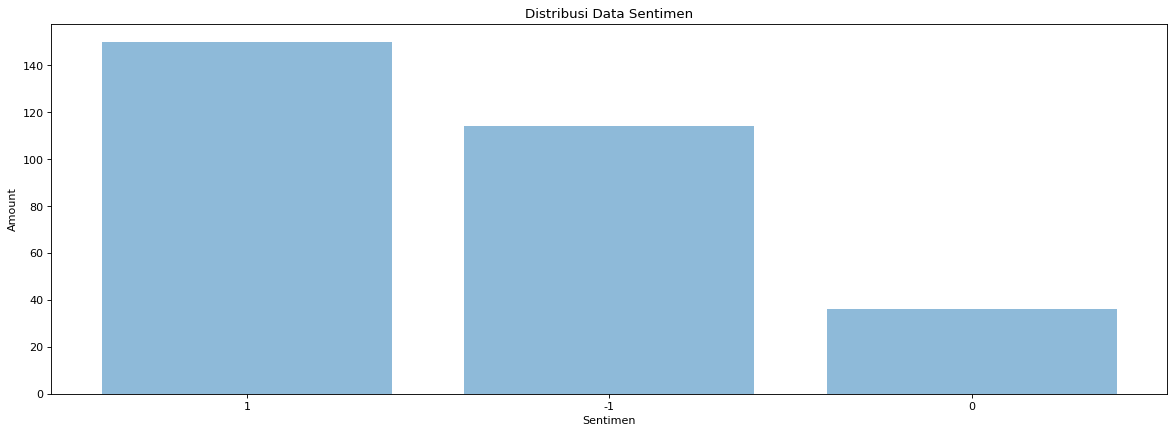

In [ ]:
objects = df_review['Sentimen'].unique()
y_pos = np.arange(len(objects))
performance = [len(df_review[df_review['Sentimen'] == sentiment]) for sentiment in df_review['Sentimen'].unique()]

plt.figure(figsize = (18, 6), dpi = 80)
plt.bar(y_pos[:15], performance[:15], align = 'center', alpha = 0.5)
plt.xticks(y_pos[:15], objects[:15])
plt.ylabel('Amount')
plt.xlabel('Sentimen')
plt.title('Distribusi Data Sentimen')

plt.show()

# Text Preprocessing

In [ ]:
# Menghitung jumlah nilai null pada kolom Sentimen
total_null = df_review['Sentimen'].isnull().sum()
print(f'Total null:{total_null}')

Total null:0


In [ ]:
# Menghapus baris yang terdapat nilai null
df_review = df_review.dropna(how = 'any')
df_review = df_review.reset_index()

In [ ]:
df_review

,index,userName,score,at,Ulasan,Sentimen
0,0,Rolandes Tri Putra Simanjuntak,5,2023-09-25 10:58:54,Bagus bisa liat oshi,1
1,1,Nafisah Nuraini,2,2023-09-25 10:22:24,Kenapa gk bisa login padahal udh sesuai petunj...,-1
2,2,Zinedine,1,2023-09-25 7:16:03,"Jaringan lancar bisa buat streaming YT, eh mas...",-1
3,3,Jason Frans,5,2023-09-24 14:38:57,"Apknya bagus,bisa liat cwe"" cantik",1
4,4,kaisar romawi tenggara,5,2023-09-23 13:37:55,saya suka sr apalagi michie nya pas lagi sr,1
...,...,...,...,...,...,...
295,295,SOFFA AL MARWAH,5,2020-10-04 6:46:05,perasaan dulu gw udh pernah kasih rating geh t...,1
296,296,Archo,5,2020-09-24 3:23:58,Mantap.. Tapi gimana cara beli gift nya.. Ga n...,1
297,297,TERBALIK DUNIA,5,2020-09-21 7:40:24,"Intinya bagus fiturnya juga mantap , dan yqng ...",1
298,298,Mahdi Hanif,5,2020-09-18 13:17:39,"Bang, fitur translate ditambahin bang, masih a...",1


In [ ]:
# Diubah menjadi numpy array
all_texts = df_review['Ulasan'].to_numpy()

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
import re

In [ ]:
pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 1.9 MB/s eta 0:00:00


In [ ]:
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [ ]:
# Mengimpor daftar stop words dalam bahasa Indonesia
stop_words = (stopwords.words('indonesian'))
stop_words.extend(["yg", "yqng", "dg", "rt"]) # Menambahkan daftar stop words secara manual
stop_words = set(stop_words)

In [ ]:
# Inisialisasi stemmer Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
# Fungsi untuk membersihkan teks
def clean(text):
    text = text.lower()
    text = subTo(text)
    text = replaceTOM(text)
    text = replaceSlangwords(text)
    text = processText(text)
    return text

# Fungsi untuk menghapus hal-hal yang tidak diperlukan pada teks
def subTo(text):
    text = re.sub(r'@[A-Za-a0-9]+', ' ', text) # Menghapus username yang diawali dengan @ dan diganti dengan spasi
    text = re.sub(r'[0-9]+',' ', text) # Menghapus semua angka dalam ulasan dan diganti dengan spasi
    text = re.sub(r"[-()\"#/@;:<>{}'+=~|.!?,_$&]", " ", text) # Menghapus karakter khusus dan diganti dengan spasi
    text = text.strip() # Menghapus spasi yang berlebihan
    text = text.encode('ascii', 'ignore').decode('ascii') # Menghapus emoji
    return text

# Fungsi untuk mencari pola karakter berurutan yang sama minimal 3
def replaceTOM(text):
    pattern = re.compile(r'(.)\1{2,}', re.DOTALL)
    return pattern.sub(r'\1', text)

# Fungsi untuk mengganti kata-kata slang
def replaceSlangwords(text):
    slangwordsDict = eval(open('/content/drive/MyDrive/Data/slangwords_1.txt').read())
    pattern = re.compile(r'\b(' + '|'.join(slangwordsDict.keys()) + r')\b')
    return pattern.sub(lambda x: slangwordsDict[x.group()], text)

# Fungsi untuk melakukan tokenisasi, menghapus stop words, dan stemming
def processText(text):
    word_tokens = word_tokenize(text)
    filtered_tokens = [word for word in word_tokens if word not in stop_words]
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
    return ' '.join(stemmed_tokens)

In [ ]:
# Punctuantion library
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# Membersihkan all_texts menggunakan fungsi clean(text)
all_cleaned_texts = np.array([clean(text) for text in all_texts])

In [ ]:
all_cleaned_texts

array(['bagus lihat idola', 'login sesuai tunjuk password nya salah sih',
       'jaring lancar streaming yt eh masuk aplikasi jaring error',
       'aplikasi bagus lihat cewek cantik',
       'suka showroom michie nya pas showroom', 'bagus nonton pacar',
       'seru banget nonton idola showroom',
       'mantap sih kadang notif nya lambat',
       'masuk showroom muncul gambar video idol member jkt nya suruh muat ulang aplikasi nya pas muat ulang muncul gambar vide idol nya sinyal internet bagus suruh muat ulang mohon baik iya aplikasi nya',
       'aplikasi eror kasih bintang',
       'pakai bang showroom layar nya hitam copot ttp',
       'benerin min ga error pakai wifi ah elah',
       'nonton idol sia showroomnya muat',
       'tebak unduh cmn nonton showroom idola ny',
       'aplikasi kenal idolnya fansnya', 'gatau bicara bagus aplikasi he',
       'akun hilang top up masuk', 'kembali sih bintang gratis',
       'bagus sih sih notif tulis aplikasi nya ganti bahasa indonesia no

# Model Training

In [ ]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.utils import pad_sequences
from tensorflow.keras.utils import to_categorical

In [ ]:
# Create a word-to-number mapping
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_cleaned_texts)

In [ ]:
# Encode semua kata menjadi bilangan/angka
all_encoded_texts = tokenizer.texts_to_sequences(all_cleaned_texts)
all_encoded_texts = np.array(all_encoded_texts)

<ipython-input-110-b77e48f6f866>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_encoded_texts = np.array(all_encoded_texts)


In [ ]:
# Mengecek panjangnya file
for i in range(300):
  print('length of file', i, ':', len(all_encoded_texts[i]))

length of file 0 : 3
length of file 1 : 7
length of file 2 : 9
length of file 3 : 5
length of file 4 : 6
length of file 5 : 3
length of file 6 : 5
length of file 7 : 6
length of file 8 : 33
length of file 9 : 4
length of file 10 : 8
length of file 11 : 8
length of file 12 : 5
length of file 13 : 7
length of file 14 : 4
length of file 15 : 5
length of file 16 : 5
length of file 17 : 4
length of file 18 : 13
length of file 19 : 6
length of file 20 : 5
length of file 21 : 4
length of file 22 : 9
length of file 23 : 6
length of file 24 : 6
length of file 25 : 3
length of file 26 : 3
length of file 27 : 5
length of file 28 : 2
length of file 29 : 1
length of file 30 : 4
length of file 31 : 4
length of file 32 : 14
length of file 33 : 7
length of file 34 : 3
length of file 35 : 7
length of file 36 : 5
length of file 37 : 4
length of file 38 : 8
length of file 39 : 14
length of file 40 : 2
length of file 41 : 7
length of file 42 : 5
length of file 43 : 4
length of file 44 : 8
length of file 4

In [ ]:
# Menyamakan panjang file
all_encoded_texts = pad_sequences(all_encoded_texts, maxlen = 50)

In [ ]:
# Menghitung semua label
total_labels = len(df_review['Sentimen'].unique())
print(f'Total labels: {total_labels}')

Total labels: 3


In [ ]:
# Mengubah label menjadi format array
all_labels = np.array(df_review['Sentimen'])

In [ ]:
# Membuat nex axis
all_labels = all_labels[:, np.newaxis]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, classification_report

In [ ]:
# Mengubah label menjadi data numerik menggunakan one-hot encoder
one_hot_encoder = OneHotEncoder(sparse = False)
all_labels = one_hot_encoder.fit_transform(all_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Membagi data untuk train dan test
X_train,X_test,y_train,y_test = train_test_split(all_encoded_texts, all_labels, test_size=0.3, random_state=10, stratify = all_labels)

In [ ]:
# Membangun NN
model = Sequential()
model.add(Embedding(input_dim = len(tokenizer.word_index) + 1, output_dim = 64, input_length = 50))
model.add(LSTM(100))
model.add(Dense(total_labels,activation = 'sigmoid'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
# Melatih model
history = model.fit(X_train,y_train, epochs=10, batch_size=64,validation_data=(X_test,y_test))

Epoch 1/10
4/4 [==============================] - 4s 293ms/step - loss: 1.0918 - accuracy: 0.3571 - val_loss: 1.0640 - val_accuracy: 0.4889
Epoch 2/10
4/4 [==============================] - 0s 100ms/step - loss: 1.0391 - accuracy: 0.5048 - val_loss: 0.9940 - val_accuracy: 0.5000
Epoch 3/10
4/4 [==============================] - 0s 96ms/step - loss: 0.9697 - accuracy: 0.5000 - val_loss: 0.9640 - val_accuracy: 0.5000
Epoch 4/10
4/4 [==============================] - 0s 86ms/step - loss: 0.9340 - accuracy: 0.5000 - val_loss: 0.9555 - val_accuracy: 0.5000
Epoch 5/10
4/4 [==============================] - 1s 183ms/step - loss: 0.9238 - accuracy: 0.5000 - val_loss: 0.9447 - val_accuracy: 0.5000
Epoch 6/10
4/4 [==============================] - 1s 160ms/step - loss: 0.9044 - accuracy: 0.5000 - val_loss: 0.9385 - val_accuracy: 0.5000
Epoch 7/10
4/4 [==============================] - 1s 185ms/step - loss: 0.8796 - accuracy: 0.5000 - val_loss: 0.9204 - val_accuracy: 0.5000
Epoch 8/10
4/4 [======

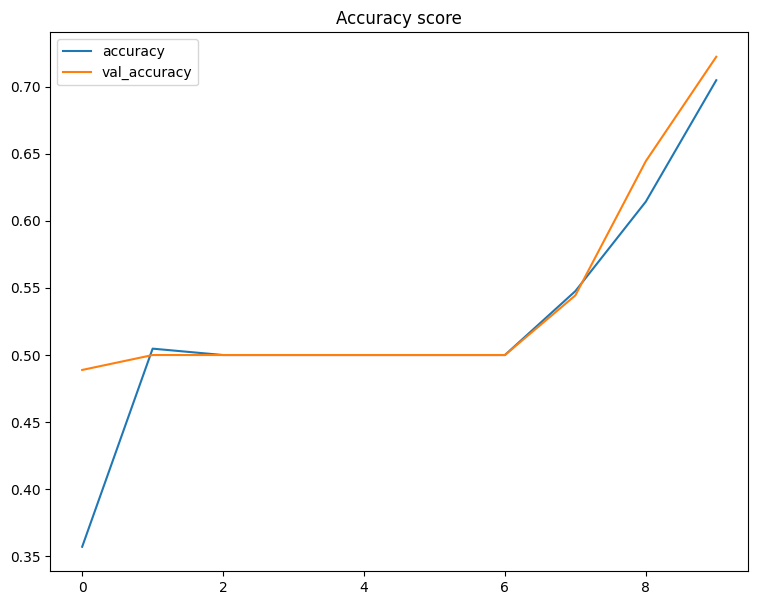

In [ ]:
plt.figure(figsize=(9,7))
plt.title('Accuracy score')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.show()

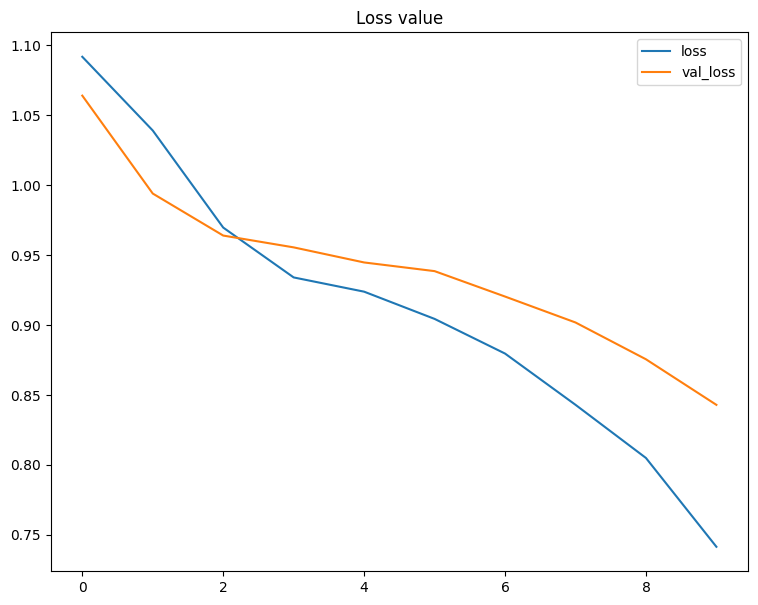

In [ ]:
plt.figure(figsize=(9,7))
plt.title('Loss value')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

In [ ]:
# Menyimpan model
import pickle
pickle.dump(model, open('model.pickle', 'wb'))

# Model Evaluation

In [ ]:
predictions = model.predict(X_test)
predictions_evaluate = np.argmax(predictions, axis=1)

3/3 [==============================] - 0s 15ms/step


In [ ]:
# Mengubah y_test (label sebenarnya) dari one-hot format
y_test_evaluate = np.argmax(y_test, axis = 1)

In [ ]:
target_names = [target_name.split('_')[1] for target_name in one_hot_encoder.get_feature_names_out()]
print(classification_report(y_test_evaluate, predictions_evaluate, target_names = target_names))
print('total weight F1 Score:', f1_score(y_test_evaluate, predictions_evaluate, average='weighted'))

              precision    recall  f1-score   support

          -1       0.72      0.76      0.74        34
           0       0.00      0.00      0.00        11
           1       0.72      0.87      0.79        45

    accuracy                           0.72        90
   macro avg       0.48      0.54      0.51        90
weighted avg       0.63      0.72      0.67        90

total weight F1 Score: 0.6745743145743144


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Test

In [ ]:
strings_to_predict = [
    'Kenapa gk bisa login padahal udh sesuai petunjuk, password nya bnr tpi mlh salah sih gmn 👽',
    'Gabisa login sama sign up padahal udah ada instruksi lanjutkan pas dibuka di fb tapi pas di showroom nya belum kedaftar akunnya mohon diperbaiki lagi apk nya karena kasus ini bukan yang pertama kali tapi sudah berkali kali,ini masalahnya gabisa login dan sign up padahal di fb sudah tertaut akunnya tapi di showroom gaada akunnya',
    'Aplikasi nya bagus dan berfungsi dengan baik',
    'Bagus,mungkin performanya di tingkat tin dikit biar tambah hd🗿',
]

In [ ]:
# Inisialisasi list untuk menyimpan hasil prediksi sentimen
predicted_sentiments = []

In [ ]:
# Melakukan prediksi untuk setiap string dalam list
for string in strings_to_predict:
    # Melakukan text preprocessing untuk data baru
    cleaned_string = clean(string)
    # Mengkodekan string yang telah dibersihkan menjadi urutan numerik
    encoded_string = tokenizer.texts_to_sequences([cleaned_string])
    encoded_string = sequence.pad_sequences(encoded_string, maxlen=50)
    # Melakukan prediksi sentimen menggunakan model
    string_predict = model.predict(encoded_string)
    # Mengonversi hasil prediksi menjadi label sentimen
    predicted_sentiment = str(one_hot_encoder.inverse_transform(string_predict).item())
    # Menyimpan label sentimen prediksi ke dalam daftar predicted_sentiments
    predicted_sentiments.append(predicted_sentiment)

1/1 [==============================] - 0s 38ms/step


In [ ]:
# Menampilkan hasil prediksi
for i, string in enumerate(strings_to_predict):
    print(f'Data {i + 1}: {string}')
    print(f'Predicted Sentiment: {predicted_sentiments[i]}\n')

Data 1: Kenapa gk bisa login padahal udh sesuai petunjuk, password nya bnr tpi mlh salah sih gmn 👽
Predicted Sentiment: -1

Data 2: Gabisa login sama sign up padahal udah ada instruksi lanjutkan pas dibuka di fb tapi pas di showroom nya belum kedaftar akunnya mohon diperbaiki lagi apk nya karena kasus ini bukan yang pertama kali tapi sudah berkali kali,ini masalahnya gabisa login dan sign up padahal di fb sudah tertaut akunnya tapi di showroom gaada akunnya
Predicted Sentiment: -1

Data 3: Aplikasi nya bagus dan berfungsi dengan baik
Predicted Sentiment: 1

Data 4: Bagus,mungkin performanya di tingkat tin dikit biar tambah hd🗿
Predicted Sentiment: 1

